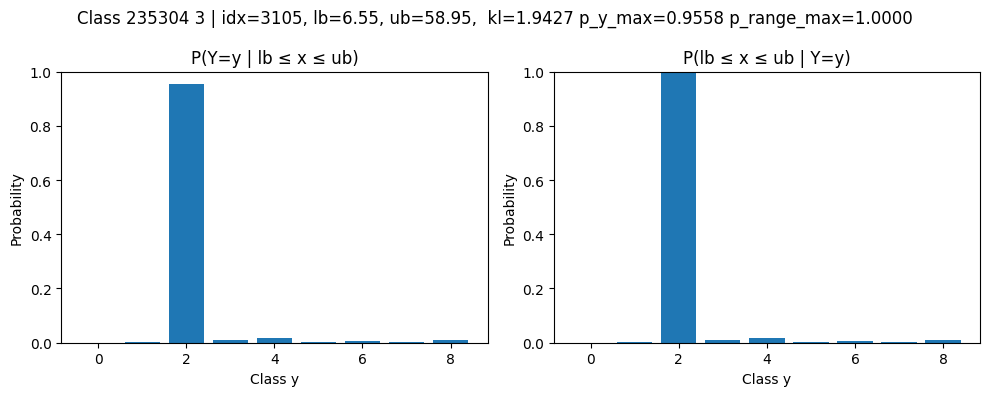

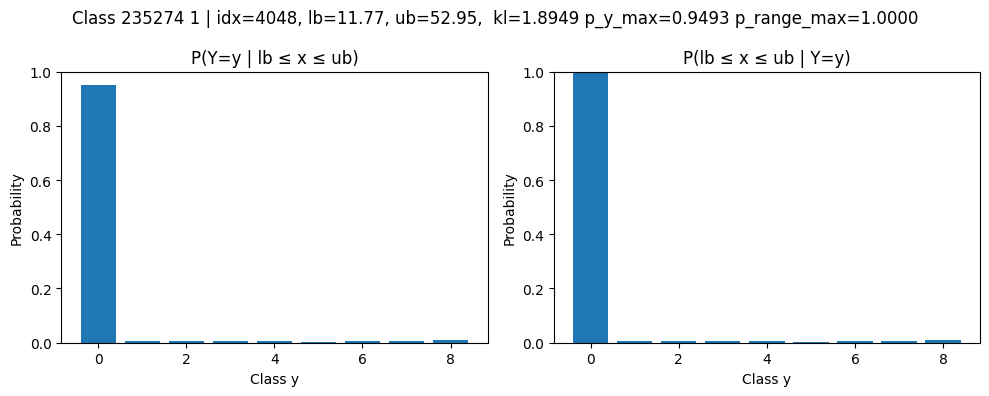

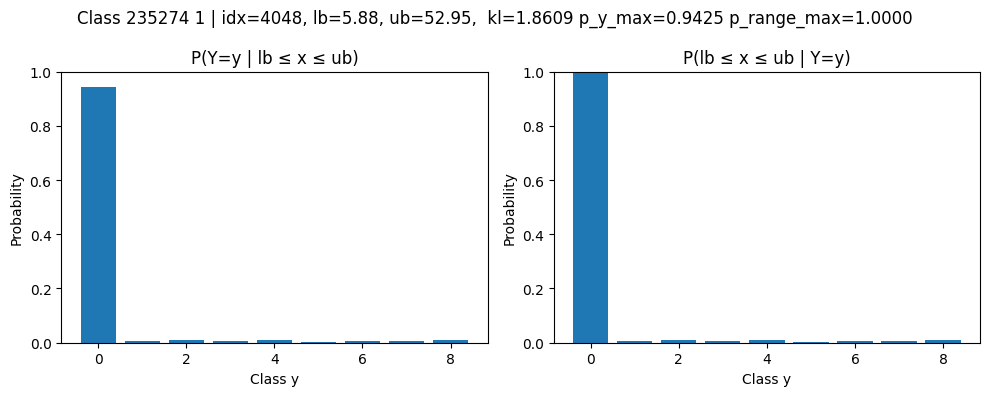

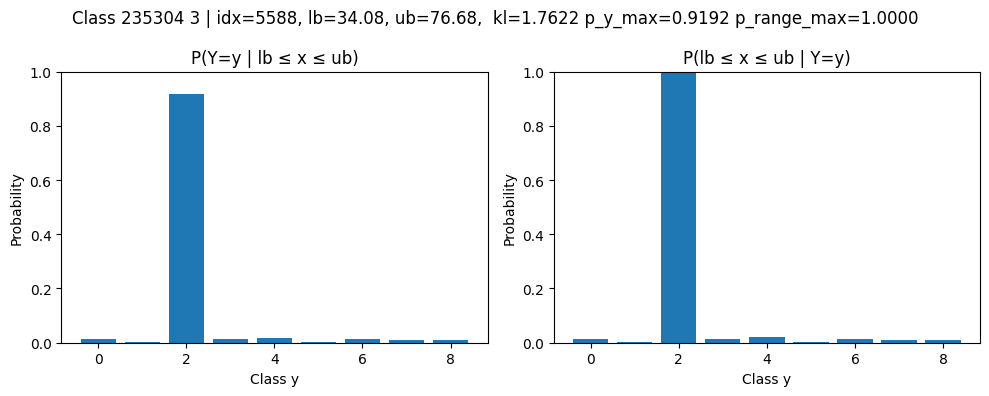

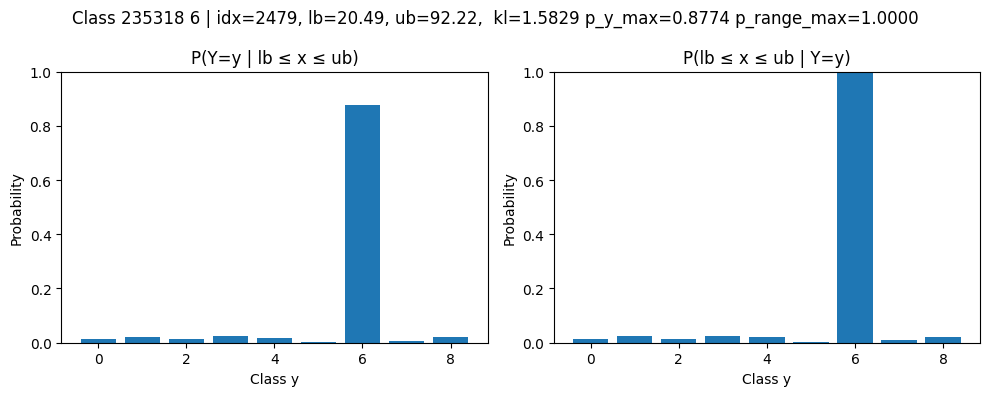

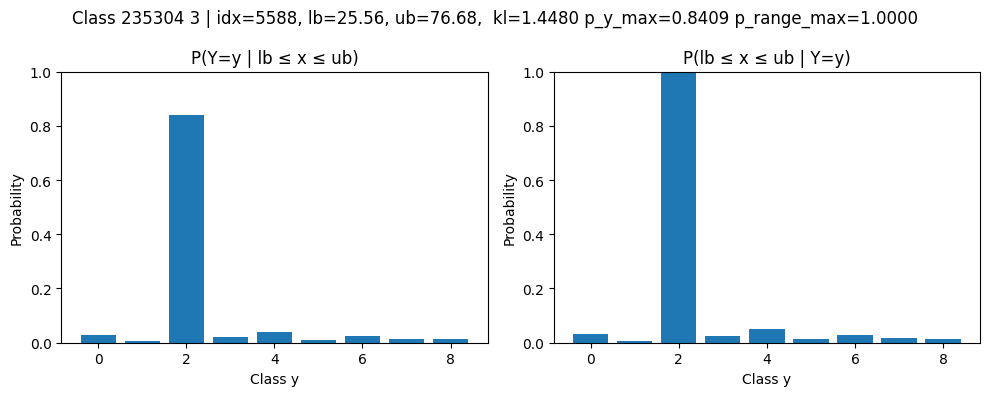

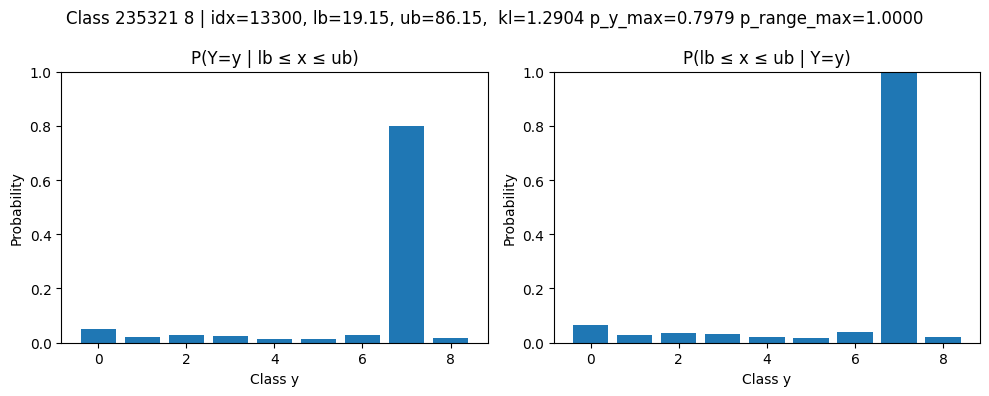

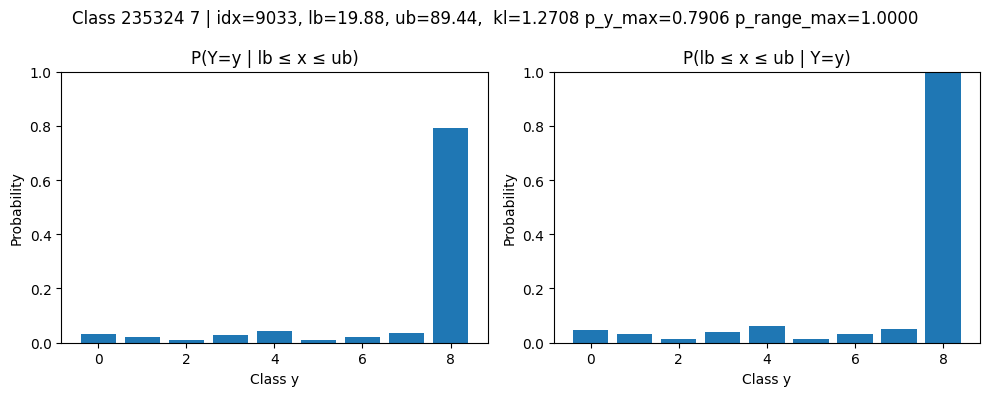

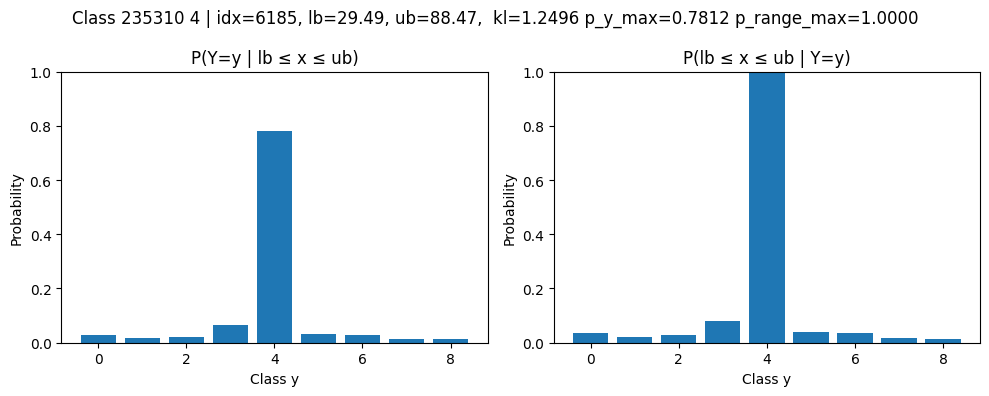

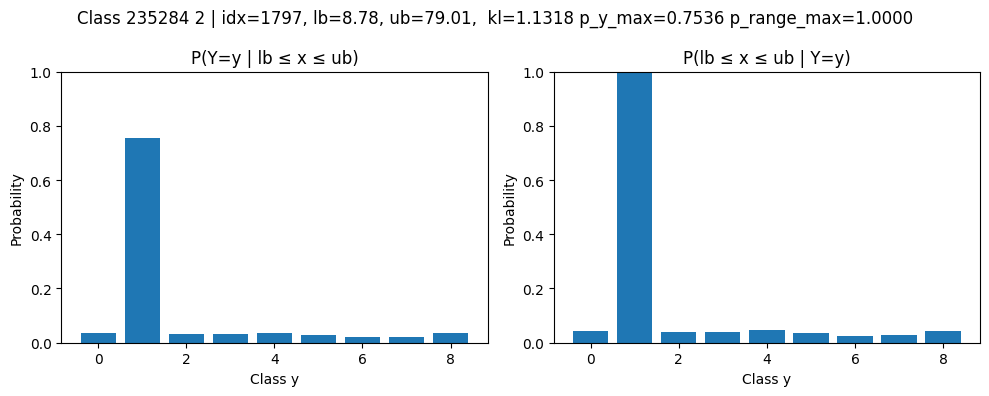

In [ ]:
# %%

# latent activation statistics
num_plot = 10
i = 0
entries.sort(key=lambda x: (-x.p_range_max, -x.p_y_max))
for entry in entries:
    class_tokenized = entry.pred_class
    class_cleantext = tokenizer.decode(torch.tensor(entry.pred_class))
    if entry.p_y_max > 0.7 and entry.p_range_max > 0.7:
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        fig.suptitle(
            f"Class {class_tokenized} {class_cleantext} | "
            f"idx={entry.latent_idx}, lb={entry.lb:.2f}, ub={entry.ub:.2f}, "
            f" kl={entry.kl:.4f}"
            f" p_y_max={entry.p_y_max:.4f}"
            f" p_range_max={entry.p_range_max:.4f}"
        )

        # P(Y=y | lb ≤ x ≤ ub)
        axes[0].bar(range(len(entry.p_y)), entry.p_y)
        axes[0].set_title('P(Y=y | lb ≤ x ≤ ub)')
        axes[0].set_xlabel('Class y')
        axes[0].set_ylabel('Probability')
        axes[0].set_ylim(0, 1.0)

        # P(lb ≤ x ≤ ub | Y=y)
        axes[1].bar(range(len(entry.p_range)), entry.p_range)
        axes[1].set_title('P(lb ≤ x ≤ ub | Y=y)')
        axes[1].set_xlabel('Class y')
        axes[1].set_ylabel('Probability')
        axes[1].set_ylim(0, 1.0)

        plt.tight_layout()
        plt.show()
        
        i += 1
        if i == num_plot:
            break